# Download Package 

In [0]:
!git clone https://github.com/congnghia0609/ntc-scv.git
!git clone https://github.com/deepai-solutions/core_nlp.git

Cloning into 'ntc-scv'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (30/30), done.
Cloning into 'core_nlp'...
remote: Enumerating objects: 205, done.
remote: Total 205 (delta 0), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (205/205), 9.69 MiB | 28.53 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [0]:
!pip install underthesea
!pip install pyvi
!pip install -r 'core_nlp/requirements.txt'

     |████████████████████████████████| 7.1MB 2.6MB/s 
     |████████████████████████████████| 460kB 38.6MB/s 
     |████████████████████████████████| 1.4MB 35.1MB/s 
     |████████████████████████████████| 757kB 31.3MB/s 
     |████████████████████████████████| 5.4MB 35.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
  Stored in directory: /root/.cache/pip/wheels/4f/e9/45/223565e5b1a4b09e12c6de6f8ba7c2c0e9127dec17cf830f83
  Stored in directory: /root/.cache/pip/wheels/58/54/ea/d995d18af68c057eb76b87b02c92bc66ac34d360ef141780f4
Successfully built nltk clint args
  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 5.3MB 2.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/49/44/c1/5

# Import 

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from os import listdir
from os.path import isfile, join
from ast import literal_eval
from pprint import pprint
import pickle
import itertools
import operator 


import numpy as np
import pandas as pd


# Vietnamese NLP 
from core_nlp.tokenization.crf_tokenizer import CrfTokenizer
from underthesea import pos_tag
from pyvi import ViTokenizer, ViPosTagger



# String manipulation 
import re
import string
import spacy

# Gensim 
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText
from gensim import corpora, models
from gensim.models.phrases import Phrases, Phraser


# Word Cloud 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

# Progress Bar 
from tqdm import tqdm_notebook as tqdm
from time import sleep,time
import datetime 

# Plot 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Functions 

### Preprocessing 

In [0]:
# my_regex = r'[^qwertyuiopasdfghjklzxcvbnm_ đáàaãảạăắằẳẵặâấầẩẫậóòỏõọôốồổộỗơớờởỡợúùủũụưứừữựửiíìỉĩịyýỳỷỹỵeéèẻẽẹêếềểễệ,;.?!1234567890]'

false_mark = ' ́'[1] + ' ̀'[1] + ' ̉'[1] + ' ̣'[1] + ' ̃'[1]
vietnam_alp = 'áàãảạăắằẳẵặâấầẩẫậóòỏõọôốồổộỗơớờởỡợúùủũụưứừữựửíìỉĩịýỳỷỹỵéèẻẽẹêếềểễệ'
my_regex_2 = r'(?P<mark>[áàãảạắằẳẵặấầẩẫậóòỏõọốồổộỗớờởỡợúùủũụứừữựửíìỉĩịýỳỷỹỵéèẻẽẹếềểễệ]) (?P<word>([a-z][a-z][_.,;!?]* )|([a-z][_.,;!?]* )|([a-z][a-z][.,;!?])|([a-z][[.,;!?]]))'
my_regex_3 = r'[^\w\s,;.?!_]'
my_regex_4 = r'[1-90]'

def preprocessing(comment):
  """
  This function will remove all special character except commas and full stop. 
  """
  #Remove not have mark 
  if (not is_have_mark(comment)):
    return np.NaN
  
  #Convert to lower case , so that Hi and hi are the same
  comment = comment.lower()

  # Remove False Mark String 
  if any ( c in false_mark for c in comment):
     comment = recompile_false_mark(comment)

  # Change ko to khong 
  comment = re.sub(' ko '," không ", comment)
  comment = re.sub('[^\d ]*k '," không ", comment)
  # Change dc to duoc
  comment = re.sub(' dc '," được ", comment)
  # remove \n and tags 
  comment = re.sub(r'< a.*\/a>',"",comment)
  comment = re.sub("\\n", " ", comment)
  comment = re.sub(" _ ", "", comment)
  
  # remove special characters 
  comment = re.sub(r'[+\-"():\\\/\^<>]'," ",comment) #.,;!?_
  # Remove Icons
  comment = re.sub(my_regex_3,"",comment)
  # Remove Numbers
  comment = re.sub(my_regex_4," ",comment)
  # Remove Redundant Space 
  comment = re.sub(' +'," ", comment)
  comment = comment.strip()

  return comment


def recompile_false_mark(string):
  """ 
    Recomplie False Mark
  """
  
  string =  re.sub('a ́','á',string)  
  string =  re.sub('a ̀','à',string)  
  string =  re.sub('a ̉','ả',string)
  string =  re.sub('a ̣','ạ',string)  
  string =  re.sub('a ̃','ã',string) 
  
  string =  re.sub('ă ́','ắ',string)  
  string =  re.sub('ă ̀','ằ',string)  
  string =  re.sub('ă ̉','ẳ',string)
  string =  re.sub('ă ̣','ặ',string)  
  string =  re.sub('ă ̃','ẵ',string)  
  
  string =  re.sub('â ́','ấ',string)  
  string =  re.sub('â ̀','ầ',string)  
  string =  re.sub('â ̉','ậ',string)
  string =  re.sub('â ̃','ẫ',string)  
  string =  re.sub('â ̣','ậ',string)  
  
  string =  re.sub('o ́','ó',string)  
  string =  re.sub('o ̀','ò',string)  
  string =  re.sub('o ̉','ỏ',string)
  string =  re.sub('o ̃','õ',string)  
  string =  re.sub('o ̣','ọ',string)  
  
  string =  re.sub('ô ́','ố',string)  
  string =  re.sub('ô ̀','ồ',string)  
  string =  re.sub('ô ̉','ổ',string)
  string =  re.sub('ô ̃','ỗ',string)  
  string =  re.sub('ô ̣','ộ',string)
  
  string =  re.sub('ơ ́','ớ',string)  
  string =  re.sub('ơ ̀','ờ',string)  
  string =  re.sub('ơ ̉','ở',string)
  string =  re.sub('ơ ̃','ỡ',string)  
  string =  re.sub('ơ ̣','ợ',string)

  string =  re.sub('u ́','ú',string)  
  string =  re.sub('u ̀','ù',string)  
  string =  re.sub('u ̉','ủ',string)
  string =  re.sub('u ̃','ũ',string)  
  string =  re.sub('u ̣','ụ',string)
  
  string =  re.sub('ư ́','ứ',string)  
  string =  re.sub('ư ̀','ừ',string)  
  string =  re.sub('ư ̉','ử',string)
  string =  re.sub('ư ̃','ữ',string)  
  string =  re.sub('ư ̣','ự',string)
  
  string =  re.sub('i ́','í',string)  
  string =  re.sub('i ̀','ì',string)  
  string =  re.sub('i ̉','ỉ',string)
  string =  re.sub('i ̃','ĩ',string)  
  string =  re.sub('i ̣','ị',string)
  
  string =  re.sub('y ́','ý',string)  
  string =  re.sub('y ̀','ỳ',string)  
  string =  re.sub('y ̉','ỷ',string)
  string =  re.sub('y ̃','ỹ',string)  
  string =  re.sub('y ̣','ỵ',string)
  
  string =  re.sub('e ́','é',string)  
  string =  re.sub('e ̀','è',string)  
  string =  re.sub('e ̉','ẻ',string)
  string =  re.sub('e ̃','ẽ',string)  
  string =  re.sub('e ̣','ẹ',string)
  
  string =  re.sub('ê ́','ế',string)  
  string =  re.sub('ê ̀','ề',string)  
  string =  re.sub('ê ̉','ể',string)
  string =  re.sub('ê ̃','ễ',string)  
  string =  re.sub('ê ̣','ệ',string)
  
  string = re.sub(my_regex_2,'\g<mark>\g<word> ',string)
  return string
  

def is_false_mark(string):
    """
      True if string is false mark. 
    """
    return (any ( c in false_mark for c in string))

def is_have_digit(string):
    """
      True if string have digit. 
    """
    return (any ( c in ['1234567890'] for c in string))
    
  
def is_have_mark(string):
    """
      False if string is not have mark 
    """
    return (any ( c in vietnam_alp for c in string))
  
def remove_stop_word(tokens,stop_words):
    """
        Remove stopwords
    """
    tokens =  [ w for w in tokens if len(w) > 2 ] 
    tokens =  [ w for w in tokens if w not in stop_words]
    return tokens

def remove_digit(tokens):
    tokens = [ w for w in re.sub('/d',' ',tokens) ]
    return tokens 
  
    
def tokenize(string):
    """
        Split String
    """
    return string.split(' ')
    
def split_sentence_comma(comment): 
  """
    Split Sentences Comma
  """
  split_sentence = re.split("\\,|\\.|\\!", comment)
  for i in range(len(split_sentence)-1): 
    if (len(split_sentence[i+1].split(" ")) <= 2 ): 
       split_sentence[i] = split_sentence[i] + split_sentence[i+1]
  return split_sentence

def split_sentence_stop(comment): 
    split_sentence = re.split("\\.|\\!", comment)
    return split_sentence


def split_dataframe(df):
  list_sentence = [] 
  count = 0
  for row in df.itertuples():
    sentences = [s for s in row.sentences]
    index = [count for i in row.review]
    label = [row.label for i in row.review]
    index_sentence = [list(a) for a in zip(index, sentences,label)]
    list_sentence= list_sentence + index_sentence
    count += 1 
    
  split_df = pd.DataFrame(list_sentence,columns = ['id','review','label'])
  split_df.reset_index(drop = True, inplace = True)
  return split_df



### TSNE 

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

def tsne_cluster_plot(model,labels,words):
    "Creates and TSNE model and plots it"
    name = []
    tokens = []

    for word in words:
        tokens.append(model[word])
        name.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i],label=labels[i] ,color =sns.color_palette("deep",70)[labels[i]])
        plt.annotate(name[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
#     plt.legend(numpoints=1)
    plt.show()

# Load Dataset and Preprocessing

In [0]:
with  open('drive/My Drive/ADML/Data/training.pkl','rb')  as f:
    df = pickle.load(f)  

f = open("drive/My Drive/ADML/Data/vnstopword (1).txt", "r")
stop_words = f.read().split('\n')

In [0]:
df = df.dropna().reset_index(drop = True)
df['review'] = df['review'].apply(preprocessing)
df = df.dropna().reset_index(drop = True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29756 entries, 0 to 29755
Data columns (total 2 columns):
review    29756 non-null object
label     29756 non-null float64
dtypes: float64(1), object(1)
memory usage: 465.0+ KB


In [0]:
temp = pd.DataFrame(df)
temp["sentences"] = temp["review"].apply(lambda comment: split_sentence_comma(comment))
split_df = split_dataframe(temp) #,column = 'split comma')

split_df["review"] = split_df['review'].apply(lambda comment: preprocessing(comment))
split_df = split_df.dropna().reset_index(drop = True)

In [0]:
split_df.head()

,id,review,label
0,0,trước giờ mình ít khi đi xem phim tại rạp,1.0
1,0,nhưng từ khi tình_cờ xem phim tại cgv mình liề...,1.0
2,0,giá tuy hơn cao nhưng bù lại được hưởng các dị...,1.0
3,1,đi ăn rồi ghé qua đây uống trà sữa luôn hehe,1.0
4,1,không_gian đẹp,1.0


# Phraser 

In [0]:
# Bigram
def phrase_words(sentences):
    sent = [s.split() for s in sentences]

    phrases = Phrases(sent, min_count=30, progress_per=10000)
    bigram = Phraser(phrases)

    sentences = [bigram[x] for x in sent]
    phrases = Phrases(sentences, min_count=30, progress_per=10000)
    # Trigram
    trigram = Phraser(phrases)
    sentences = [trigram[x] for x in sentences]
    sentences = [" ".join(s) for s in sentences ]
    return sentences 

In [0]:
sentences = [ s for s in  df['review']]
df['review'] = phrase_words(sentences)

In [0]:
sentences = [ s for s in  split_df['review']]
split_df['review'] = phrase_words(sentences)

In [0]:
df.head()

,review,label
0,"trước giờ mình ít khi đi xem_phim tại rạp , nh...",1.0
1,đi ăn rồi ghé_qua đây uống trà_sữa luôn hehe ....,1.0
2,"món dế cơm ngon , thơm tuyệt_vời nhất mà minh ...",1.0
3,"ăn cũng tàm_tạm , không ngon như các_bạn miêu_...",0.0
4,hồi mới_mở quán trông mấy bộ bàn_ghế nhỏ_xinh ...,0.0


In [0]:
split_df.head()

,id,review,label
0,0,trước giờ mình ít khi đi xem_phim tại rạp,1.0
1,0,nhưng từ khi tình_cờ xem_phim tại cgv mình liề...,1.0
2,0,giá tuy hơn cao nhưng_bù_lại được hưởng các dị...,1.0
3,1,đi ăn rồi ghé_qua đây uống trà_sữa luôn hehe,1.0
4,1,không_gian đẹp,1.0


# POS Tagging

In [0]:
sent = "quán công_nhận ngon . nhưng có_điều đi vệ_sinh phải chạy qua công_viên . làm nhỏ bạn đang ăn đòi về ."
out = ViPosTagger.postagging(ViTokenizer.tokenize(sent))
list(zip(out[0],out[1]))

[('quán', 'N'),
 ('công_nhận', 'V'),
 ('ngon', 'A'),
 ('.', 'F'),
 ('nhưng', 'C'),
 ('có_điều', 'N'),
 ('đi', 'V'),
 ('vệ_sinh', 'V'),
 ('phải', 'V'),
 ('chạy', 'V'),
 ('qua', 'V'),
 ('công_viên', 'N'),
 ('.', 'F'),
 ('làm', 'V'),
 ('nhỏ', 'A'),
 ('bạn', 'N'),
 ('đang', 'R'),
 ('ăn', 'V'),
 ('đòi', 'V'),
 ('về', 'V'),
 ('.', 'F')]

In [0]:
from pyvi import ViTokenizer, ViPosTagger

# df['Noun'] = 'NaN'
# df['Adj'] = 'NaN'

start = datetime.datetime.now()

review = [r for r in df['review']]
tupples = list(map( lambda review: ViPosTagger.postagging(ViTokenizer.tokenize(review)),review))


end = datetime.datetime.now()
print("End. Time : {}".format(end-start))

NameError: ignored

In [0]:
from pyvi import ViTokenizer, ViPosTagger

# df['Noun'] = 'NaN'
# df['Adj'] = 'NaN'

start = datetime.datetime.now()

review = [r for r in split_df['review']]
tupples = list(map( lambda review: ViPosTagger.postagging(ViTokenizer.tokenize(review)),review))


end = datetime.datetime.now()
print("End. Time : {}".format(end-start))

End. Time : 0:01:26.003785


In [0]:
Noun = []
for tupple in tupples:
    indices = [i for i, x in enumerate(tupple[1]) if x == "N"]
    Noun.append([ tupple[0][i] for i in indices  ])

In [0]:
Adj = []
for tupple in tupples:
    adj = []
    indices_a = [i for i, x in enumerate(tupple[1]) if x == "A"]
    indices_r = [i-1 for i in indices_a if  tupple[1][i-1] == "R"]  
    indices_combine = [ i+1 for i in indices_r ]
    diff_indices = list(set(indices_a) - set(indices_combine))
    adj = adj  + [ tupple[0][i] + "_" + tupple[0][i+1] for i in indices_r  ]
    adj = adj  + [ tupple[0][i] for i in diff_indices  ]
    Adj.append(adj)

In [0]:
df['Noun'] = Noun
df['Adj']  = Adj 

# with  open('drive/My Drive/ADML/Data/transform_data.pkl','wb')  as f:
#     pickle.dump(df,f)  

In [0]:
split_df['Noun'] = Noun
split_df['Adj'] = Adj 

In [0]:
df.head()

,review,label,Noun,Adj
0,"trước giờ mình ít khi đi xem_phim tại rạp , nh...",1.0,"[giờ, khi, rạp, khi, tình_cờ, cgv, địa_điểm, g...","[hơn_cao, ít, tốt, cao_cấp, duy_nhất, cao]"
1,đi ăn rồi ghé_qua đây uống trà_sữa luôn hehe ....,1.0,"[trà_sữa, không_gian, ở_đây, bingsu, lần_sau]","[đẹp, giá_cả_hợp_lí]"
2,"món dế cơm ngon , thơm tuyệt_vời nhất mà minh ...",1.0,"[dế, cơm]","[ngon, thơm, tuyệt_vời]"
3,"ăn cũng tàm_tạm , không ngon như các_bạn miêu_...",0.0,"[miêu_tả, không_gian, hơi, chỗ_ngồi, m, đứa_bạ...","[cũng_tàm_tạm, không_ngon, cũng_chật, tàm_tạm,..."
4,hồi mới_mở quán trông mấy bộ bàn_ghế nhỏ_xinh ...,0.0,"[hồi, mới_mở, quán, bàn_ghế, nhỏ_xinh, đáng_yê...","[chưa_ấn_tượng, ấn_tượng, gọn_gàng, hiện_đại, ..."


In [0]:
split_df.head()

,id,review,label,Noun,Adj
0,0,trước giờ mình ít khi đi xem_phim tại rạp,1.0,"[giờ, khi, rạp]",[ít]
1,0,nhưng từ khi tình_cờ xem_phim tại cgv mình liề...,1.0,"[khi, tình_cờ, cgv, địa_điểm]",[duy_nhất]
2,0,giá tuy hơn cao nhưng_bù_lại được hưởng các dị...,1.0,"[giá, dịch_vụ]","[hơn_cao, tốt, cao_cấp]"
3,1,đi ăn rồi ghé_qua đây uống trà_sữa luôn hehe,1.0,[trà_sữa],[]
4,1,không_gian đẹp,1.0,[không_gian],[đẹp]


In [0]:
with  open('drive/My Drive/ADML/Data/transform_data.pkl','rb')  as f:
    df =  pickle.load(f)  

EOFError: ignored

# Visualize 

In [0]:
all_noun = list(itertools.chain.from_iterable(Noun))
all_adj  = list(itertools.chain.from_iterable(Adj))

In [0]:
all_noun = list(filter(None, all_noun))
all_noun = remove_stop_word(all_noun,stop_words)

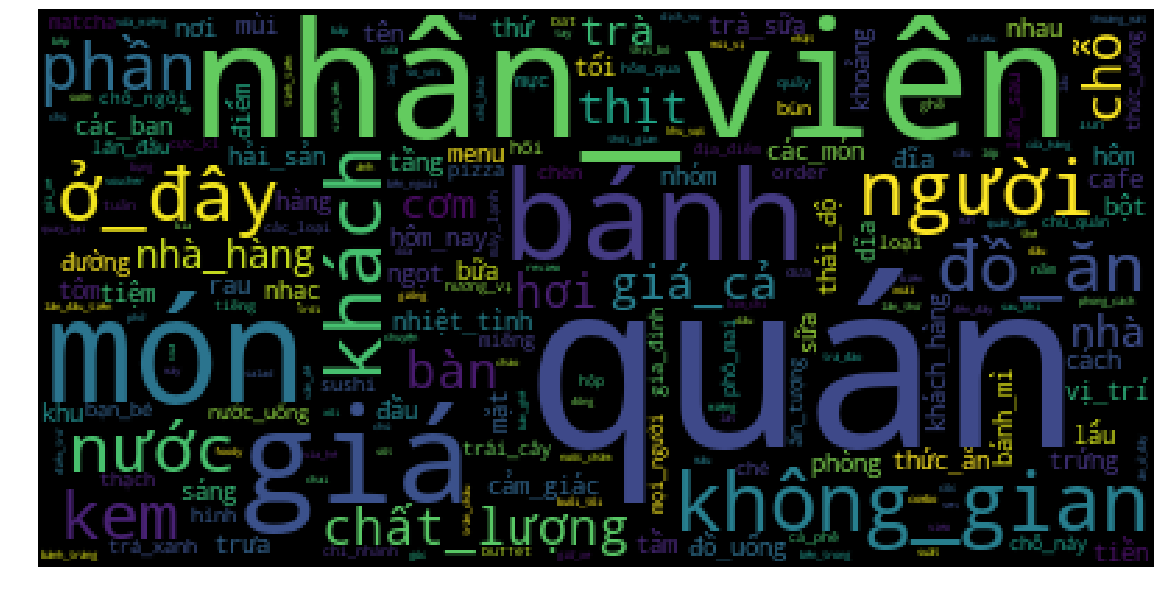

In [0]:
noun_ctr = Counter(all_noun)
wordcloud = WordCloud()
wordcloud.fit_words(noun_ctr)

fig=plt.figure(figsize=(20, 15)) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
all_adj = list(filter(None, all_adj))
# all_adj = remove_stop_word(all_adj,stop_words)

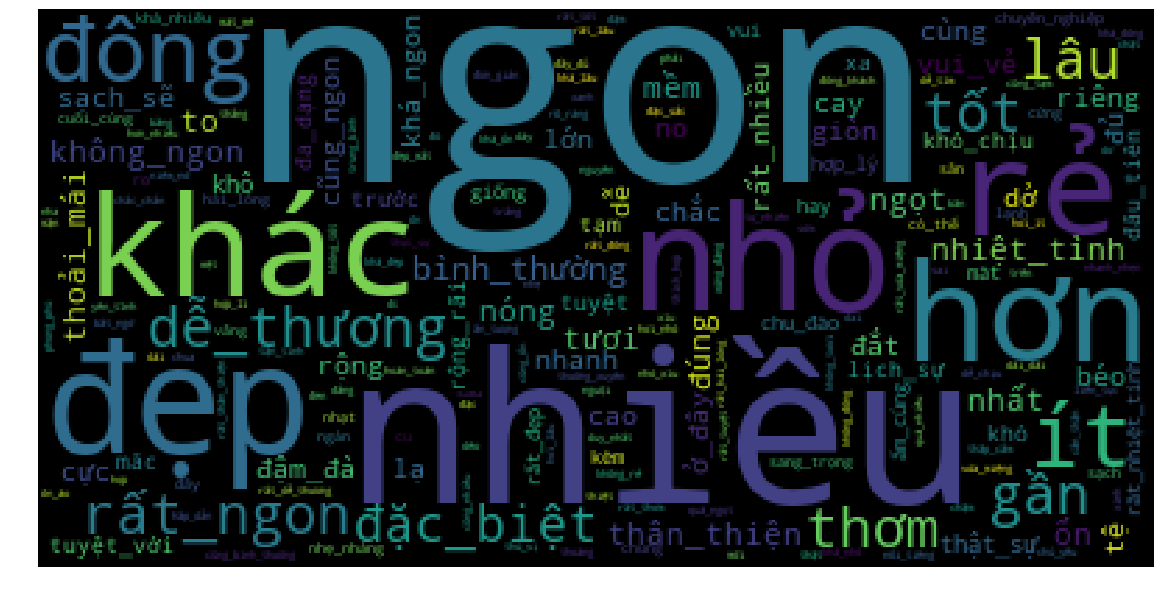

In [0]:
adj_ctr = Counter(all_adj)

wordcloud = WordCloud()
wordcloud.fit_words(adj_ctr)

fig=plt.figure(figsize=(20, 15)) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Construct Corpus 

In [0]:
tokens = [ s.split() for s in  df['review']]
tokens = [ w for w in tokens if w not in ['quán']]
tokens = list(map(lambda tokens: remove_stop_word(tokens,stop_words),tokens))

In [0]:
df['tokens'] = tokens

In [0]:
df.head()

,review,label,Noun,Adj,tokens,Topics
0,"trước giờ mình ít khi đi xem_phim tại rạp , nh...",1.0,"[giờ, khi, rạp, khi, tình_cờ, cgv, địa_điểm, g...","[hơn_cao, ít, tốt, cao_cấp, duy_nhất, cao]","[xem_phim, rạp, tình_cờ, xem_phim, cgv, liền, ...",[Không gian]
1,đi ăn rồi ghé_qua đây uống trà_sữa luôn hehe ....,1.0,"[trà_sữa, không_gian, ở_đây, bingsu, lần_sau]","[đẹp, giá_cả_hợp_lí]","[ghé_qua, uống, trà_sữa, hehe, không_gian, đẹp...","[Không gian, Đồ uống]"
2,"món dế cơm ngon , thơm tuyệt_vời nhất mà minh ...",1.0,"[dế, cơm]","[ngon, thơm, tuyệt_vời]","[món, cơm, ngon, thơm, tuyệt_vời, minh]",[]
3,"ăn cũng tàm_tạm , không ngon như các_bạn miêu_...",0.0,"[miêu_tả, không_gian, hơi, chỗ_ngồi, m, đứa_bạ...","[cũng_tàm_tạm, không_ngon, cũng_chật, tàm_tạm,...","[tàm_tạm, không, ngon, các_bạn, miêu_tả, không...",[Không gian]
4,hồi mới_mở quán trông mấy bộ bàn_ghế nhỏ_xinh ...,0.0,"[hồi, mới_mở, quán, bàn_ghế, nhỏ_xinh, đáng_yê...","[chưa_ấn_tượng, ấn_tượng, gọn_gàng, hiện_đại, ...","[hồi, mới_mở, quán, trông, bàn_ghế, nhỏ_xinh, ...","[Không gian, Phục Vụ]"


In [0]:
# all_noun_500 = list(map(lambda all_noun_500: remove_stop_word(all_noun,stop_words),all_noun))

In [0]:
all_noun_500 = remove_stop_word(all_noun_500,stop_words)

In [0]:
# all_adj = list(map(lambda all_adj: remove_stop_word(all_adj,stop_words),all_adj))

In [0]:
all_adj_500 = remove_stop_word(all_adj_500,stop_words)

# Word2Vec

In [0]:
import multiprocessing
from gensim.models import Word2Vec

n = 300
w2v_model = Word2Vec(min_count=n,
                     window=2,
                     size=150,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=4)

In [0]:
t = time()
sentences = [x for x in df['tokens']]
w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.01 mins


In [0]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.49 mins


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


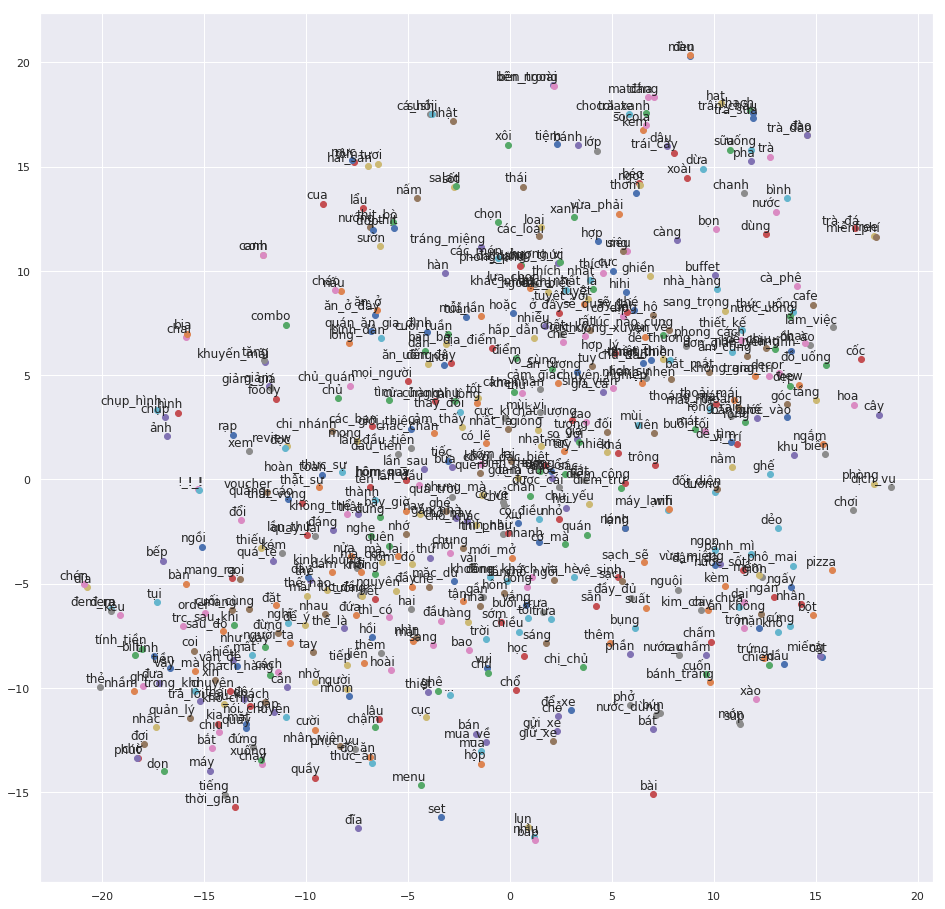

In [0]:
tsne_plot(w2v_model)

# Clustering 

### Noun

In [0]:
all_noun_n = [x for x,i in list(noun_ctr.items()) if i >= n]  
all_noun_n = set(all_noun_n).intersection(set(w2v_model.wv.vocab))
# all_noun_n = all_noun_n - set(all_adj)

In [0]:
len(all_noun_n)
# len(w2v_model.wv.vocab)

245

In [0]:
X = w2v_model[all_noun_n]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.mixture import GaussianMixture as GMM

assigned_clusters = []
for i in range(2,30):
    NUM_CLUSTERS= i
    gmm = GMM(n_components= NUM_CLUSTERS).fit(X)
    assigned_clusters.append(gmm.predict(X))

[10, 27, 23, 15, 22, 17, 13, 25, 18, 7]


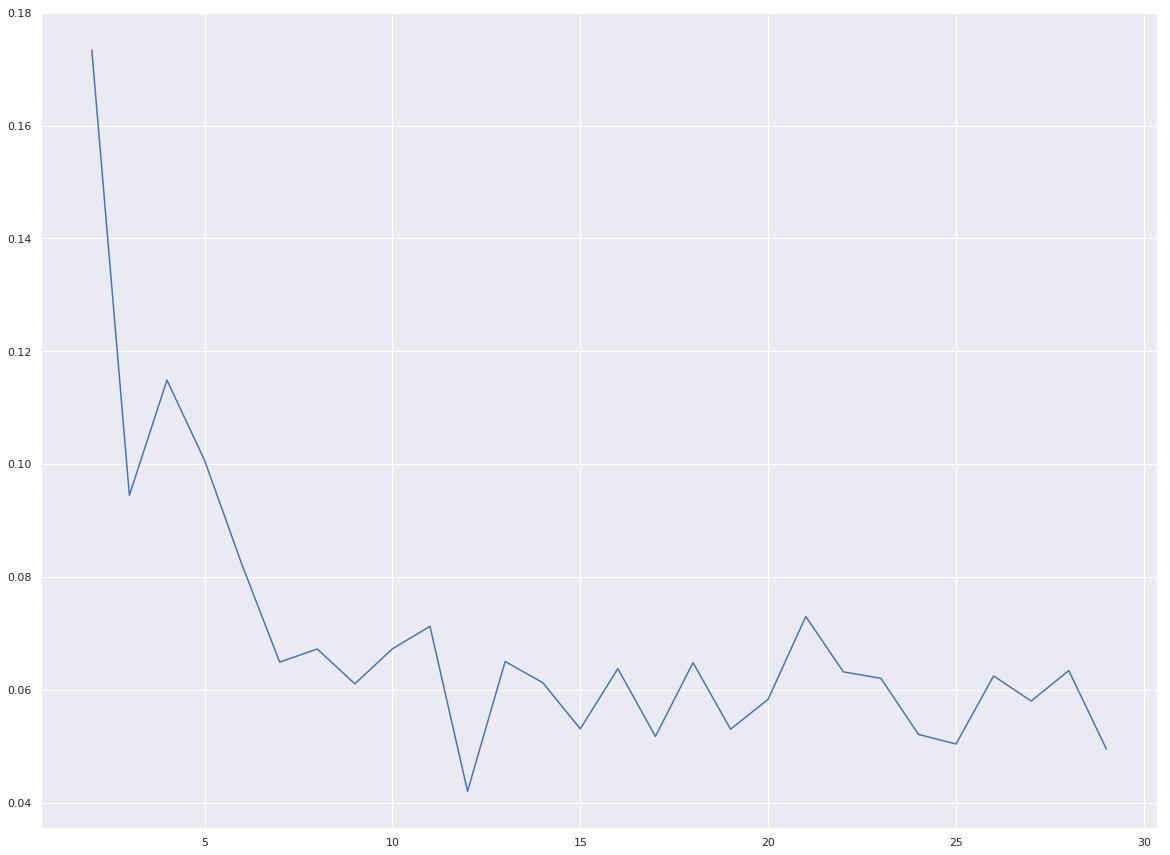

In [0]:
from sklearn.metrics import silhouette_score

score = []
for i in range(len(assigned_clusters)):
    score.append(silhouette_score(X, assigned_clusters[i], metric='euclidean'))


fig=plt.figure(figsize=(20, 15)) 
plt.plot(range(2,30),score)

# print(score)
sorted_score = sorted( range(len(score)), key=score.__getitem__)
print(sorted_score[0:10])

In [0]:
NUM_CLUSTERS= 18

gmm = GMM(n_components= NUM_CLUSTERS).fit(X)
assigned_clusters = gmm.predict(X)

words = list(set(all_noun_n))
group = list(zip(words,assigned_clusters))

Topic = [] 
# NUM_CLUSTERS = 10
for i in range(NUM_CLUSTERS):
    Topic.append([ x[0] for x in group if x[1] == i ])

for i in range(NUM_CLUSTERS):
    print('Topic {}'.format(i), end =' : ')
    for x in Topic[i]:
        print(x, end=' , ')
    print(" ")

Topic 0 : rạp , khu , lầu , khách_sạn , vị_trí , trung_tâm , chợ , địa_điểm , quận , dịch_vụ , khu_vực , tầng , phòng , biển ,  
Topic 1 : các_món , cực_kì , các_loại , giá , giống , bình_dân , nhật , cá_nhân , ăn_ở_đây , sinh_viên , chất_lượng , phở , hương_vị , cảm_giác , điểm , lòng , chất , hơi , vừa_miệng , ấn_tượng , ở_đây , giá_cả , so_với ,  
Topic 2 : phút , chủ , cách , tính_tiền , khách , order , hồi , quầy , câu , chú , tay , thẻ , mặt , thái_độ , chuyện , khách_hàng , bàn , máy , sau_đó , giữ_xe , tiếng , bill , vấn_đề , nhân_viên , sau_khi ,  
Topic 3 : bánh_tráng , dầu , muối , cua , thịt , nấm , mặn , mực , lẩu , tôm , miếng , lát , heo , nước_chấm , bún , sườn , thịt_bò , rau , hải_sản , trứng ,  
Topic 4 : sushi , buffet , khoảng , combo , set , tầm , bếp , gia_đình , thức_ăn , nhà_hàng , khói , menu , món , người , thực_đơn , đồ_ăn , nhóm ,  
Topic 5 : ếch , cháo ,  
Topic 6 : pizza , salad ,  
Topic 7 : chè , thạch , trân_châu , cốc , trà , trà_sữa ,  
Topic 8 : gửi

In [0]:
with  open('drive/My Drive/ADML/Data/gmm_model.pkl','wb')  as f:
      pickle.dump(gmm,f)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


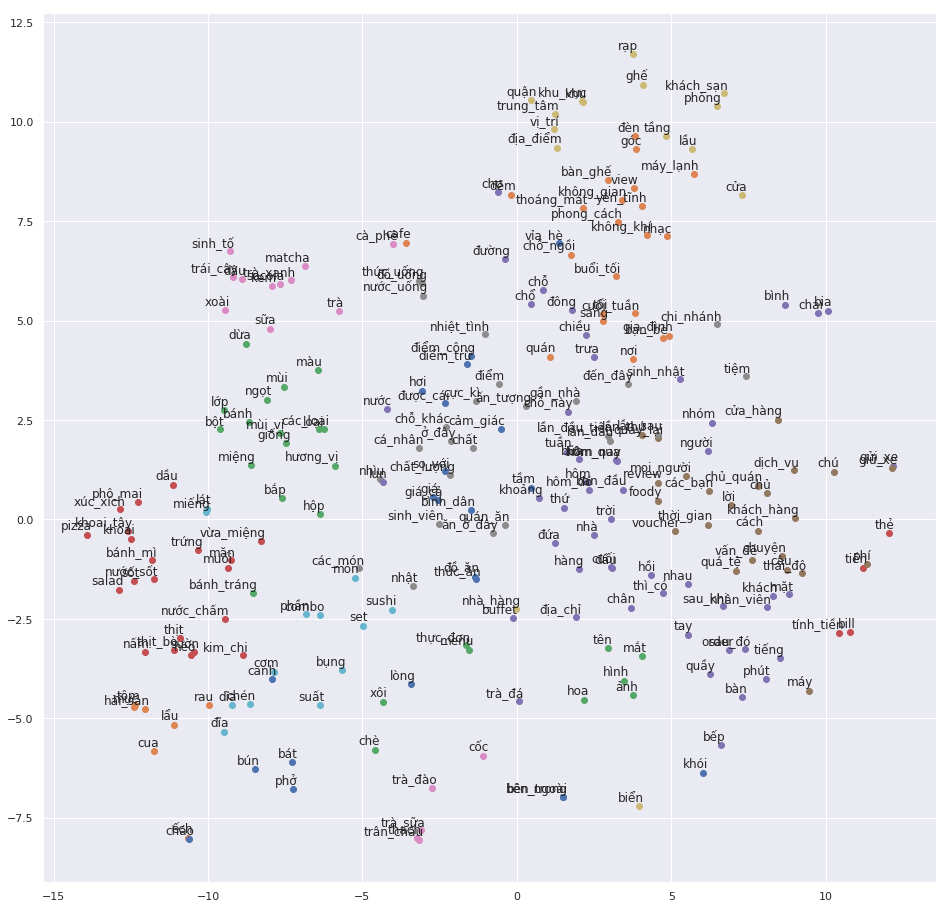

In [0]:
tsne_cluster_plot(w2v_model,assigned_clusters,words)

In [0]:
label = ['Vị Trí',
         'Đồ ăn 1',
         'Phục vụ',
         'Đồ ăn 2',
         'Đồ ăn 3',
         'Đồ ăn 4',
         'Đồ ăn 5',         
         'Đồ uống 1',
         'Không gian 1',
         'Đồ uống 2',
         'Đồ uống 2',
         'Đồ ăn 6',
         'Không gian 2',
         'Đánh giá',
         'Thời tiết',
         'Hội họp',
         'Đồ ăn 7',
         'Đồ ăn 8']


Topics = dict(zip(label,Topic))

NameError: ignored

In [0]:
with  open('drive/My Drive/ADML/Data/my_topic_2.pkl','wb')  as f:
      pickle.dump(Topics,f)  

In [0]:
with  open('drive/My Drive/ADML/Data/my_topic.pkl','rb')  as f:
      Topics = pickle.load(f)  

In [0]:
pprint(Topics,indent=4, width = 400)

{   'Không gian': ['gửi_xe', 'điểm_cộng', 'quán', 'chỗ', 'thoáng_mát', 'không_gian', 'máy_lạnh', 'nhiệt_tình', 'bàn_ghế', 'điểm_trừ', 'vỉa_hè', 'được_cái', 'đông', 'chổ', 'chỗ_ngồi', 'chân', 'nhà', 'ảnh', 'góc', 'mắt', 'đầu', 'cửa', 'trời', 'hình', 'bên_ngoài', 'bên_trong', 'ghế', 'tên', 'nhau', 'phong_cách', 'màu', 'hoa', 'đường'],
    'Phục vụ': ['phút', 'chủ', 'cách', 'tính_tiền', 'khách', 'order', 'hồi', 'quầy', 'câu', 'chú', 'tay', 'thẻ', 'mặt', 'thái_độ', 'chuyện', 'khách_hàng', 'bàn', 'máy', 'sau_đó', 'giữ_xe', 'tiếng', 'bill', 'vấn_đề', 'nhân_viên', 'sau_khi', 'rất_nhiệt_tình', 'nhiệt_tình', 'rất_dễ_thương', 'dễ_thương'],
    'Đồ uống': ['chè', 'thạch', 'trân_châu', 'cốc', 'trà', 'trà_sữa', 'socola', 'matcha', 'bột', 'ngọt', 'bánh', 'mùi', 'dừa', 'mùi_vị', 'dâu', 'kem', 'trái_cây', 'trà_xanh', 'loại', 'xoài', 'sữa', 'lớp'],
    'Đồ ăn': [   'các_món',
                 'cực_kì',
                 'các_loại',
                 'giá',
                 'giống',
                 'bình

In [0]:
Topics['Đồ ăn'] = Topics.pop('Đồ ăn 1') + Topics.pop('Đồ ăn 2') + Topics.pop('Đồ ăn 3') + Topics.pop('Đồ ăn 4') + Topics.pop('Đồ ăn 5') + Topics.pop('Đồ ăn 6') + Topics.pop('Đồ ăn 7') + Topics.pop('Đồ ăn 8') + ["ngon"] + ["không_ngon"] + ["rất_ngon"] + ["khá_ngon"] + ["cũng_ngon"] +["tươi"]
Topics.pop('Hội họp', None)
Topics.pop('Đánh giá', None)
Topics.pop('Vị Trí', None)
Topics.pop('Thời tiết', None)
Topics['Đồ uống'] = Topics.pop('Đồ uống 1') + Topics.pop('Đồ uống 2') 
Topics['Không gian'] = Topics.pop('Không gian 1') + Topics.pop('Không gian 2') 
Topics['Phục vụ'] = Topics.pop('Phục vụ') + ['rất_nhiệt_tình'] + ['nhiệt_tình'] + ['rất_dễ_thương'] + ['dễ_thương']

In [0]:
pprint(Topics,width = 1000)

{'Không gian': ['gửi_xe', 'điểm_cộng', 'quán', 'chỗ', 'thoáng_mát', 'không_gian', 'máy_lạnh', 'nhiệt_tình', 'bàn_ghế', 'điểm_trừ', 'vỉa_hè', 'được_cái', 'đông', 'chổ', 'chỗ_ngồi', 'chân', 'nhà', 'ảnh', 'góc', 'mắt', 'đầu', 'cửa', 'trời', 'hình', 'bên_ngoài', 'bên_trong', 'ghế', 'tên', 'nhau', 'phong_cách', 'màu', 'hoa', 'đường'],
 'Phục vụ': ['phút', 'chủ', 'cách', 'tính_tiền', 'khách', 'order', 'hồi', 'quầy', 'câu', 'chú', 'tay', 'thẻ', 'mặt', 'thái_độ', 'chuyện', 'khách_hàng', 'bàn', 'máy', 'sau_đó', 'giữ_xe', 'tiếng', 'bill', 'vấn_đề', 'nhân_viên', 'sau_khi', 'rất_nhiệt_tình', 'nhiệt_tình', 'rất_dễ_thương', 'dễ_thương'],
 'Đồ uống': ['chè', 'thạch', 'trân_châu', 'cốc', 'trà', 'trà_sữa', 'socola', 'matcha', 'bột', 'ngọt', 'bánh', 'mùi', 'dừa', 'mùi_vị', 'dâu', 'kem', 'trái_cây', 'trà_xanh', 'loại', 'xoài', 'sữa', 'lớp'],
 'Đồ ăn': ['các_món', 'cực_kì', 'các_loại', 'giá', 'giống', 'bình_dân', 'nhật', 'cá_nhân', 'ăn_ở_đây', 'sinh_viên', 'chất_lượng', 'phở', 'hương_vị', 'cảm_giác', 'điể

# Set Topics 

In [0]:
def set_topic(sentence,topics):
    labels = []
    tokens = tokenize(sentence.lower())
    #  tokens = bigram[tokens] 
    #  tokens = trigram[tokens] 
    for token in tokens:
        
        labels = labels + [topic for topic, words in topics.items() if token in words]
    return list(set(labels))

In [0]:
# df["review"] = df['review'].apply(lambda comment: preprocessing(comment))
# df = df.dropna().reset_index(drop = True)
# df['review'] = df['review'].apply(lambda comment: split_sentence_stop(comment))

# split_df = None 
# split_df = split_dataframe(df)

In [0]:
topics = []
for sentences in df['review']:
    topics.append(set_topic(sentences,Topics))

In [0]:
topics = []
for sentences in split_df['review']:
    topics.append(set_topic(sentences,Topics))

In [0]:
df['Topics'] = topics

In [0]:
split_df['Topics'] = topics 

In [0]:
with  open('drive/My Drive/ADML/Data/transform_data.pkl','wb')  as f:
      pickle.dump(df,f)  

In [0]:
with  open('drive/My Drive/ADML/Data/split_transform_data.pkl','wb')  as f:
      pickle.dump(split_df,f)

In [0]:
df[:100]

,review,label,Noun,Adj,tokens,Topics
0,"trước giờ mình ít khi đi xem_phim tại rạp , nh...",1.0,"[giờ, khi, rạp, khi, tình_cờ, cgv, địa_điểm, g...","[hơn_cao, ít, tốt, cao_cấp, duy_nhất, cao]","[xem_phim, rạp, tình_cờ, xem_phim, cgv, liền, ...",[Đồ ăn]
1,đi ăn rồi ghé_qua đây uống trà_sữa luôn hehe ....,1.0,"[trà_sữa, không_gian, ở_đây, bingsu, lần_sau]","[đẹp, giá_cả_hợp_lí]","[ghé_qua, uống, trà_sữa, hehe, không_gian, đẹp...","[Đồ uống, Đồ ăn, Không gian]"
2,"món dế cơm ngon , thơm tuyệt_vời nhất mà minh ...",1.0,"[dế, cơm]","[ngon, thơm, tuyệt_vời]","[món, cơm, ngon, thơm, tuyệt_vời, minh]",[Đồ ăn]
3,"ăn cũng tàm_tạm , không ngon như các_bạn miêu_...",0.0,"[miêu_tả, không_gian, hơi, chỗ_ngồi, m, đứa_bạ...","[cũng_tàm_tạm, không_ngon, cũng_chật, tàm_tạm,...","[tàm_tạm, không, ngon, các_bạn, miêu_tả, không...","[Đồ ăn, Không gian]"
4,hồi mới_mở quán trông mấy bộ bàn_ghế nhỏ_xinh ...,0.0,"[hồi, mới_mở, quán, bàn_ghế, nhỏ_xinh, đáng_yê...","[chưa_ấn_tượng, ấn_tượng, gọn_gàng, hiện_đại, ...","[hồi, mới_mở, quán, trông, bàn_ghế, nhỏ_xinh, ...","[Đồ ăn, Phục vụ, Không gian]"
5,nghe lẩu mới giảm đi thử đồ tươi_sống nhưng hơ...,1.0,"[lẩu, đồ, hơi_mặn, mì, vàng, đồ_nướng, không_g...","[chung, tận_tình, tươi, tươi_sống, hơn]","[nghe, lẩu, giảm, thử, tươi_sống, hơi_mặn, vàn...","[Phục vụ, Đồ ăn, Không gian]"
6,"thấy trên app được phết , nên mình cũng mom me...",1.0,"[app, phết, cảm_nhận_đầu_tiên, không_gian, quá...","[không_rộng, không_nhỏ, rất_nhiệt_tình, rất_lạ...","[app, phết, mom, mem, thử, cảm_nhận_đầu_tiên, ...","[Phục vụ, Đồ ăn, Không gian]"
7,đồ_ăn thì không tuy là nước_lẩu hơi_nhạt và bá...,0.0,"[đồ_ăn, nước_lẩu, hơi_nhạt, bánh_đa, cơ_mà, qu...","[không_tuy, khá_thái_độ, không_nhiệt_tình, chư...","[đồ_ăn, không, tuy, nước_lẩu, hơi_nhạt, bánh_đ...","[Phục vụ, Đồ ăn, Không gian]"
8,"trà_đào ngon , do đi vội chưa ăn đc bingsu , n...",1.0,"[trà_đào, đc, bingsu, nhân_viên, không_gian]","[ngon, tận_tình, vội, đẹp]","[trà_đào, ngon, vội, bingsu, nhân_viên, tận_tì...","[Phục vụ, Đồ ăn, Không gian]"
9,"quán view_đẹp , mát_mẻ . nhân_viên phục_vụ nhi...",1.0,"[quán, view_đẹp, nhân_viên, nhiệt_tình, kem, b...","[quá_béo, đều_ổn, mát_mẻ, chu_đáo, mát, ngon, ...","[quán, view_đẹp, mát_mẻ, nhân_viên, phục_vụ, n...","[Đồ uống, Đồ ăn, Phục vụ, Không gian]"


In [0]:
split_df[:100]

,id,review,label,Noun,Adj,Topics
0,0,trước giờ mình ít khi đi xem_phim tại rạp,1.0,"[giờ, khi, rạp]",[ít],[]
1,0,nhưng từ khi tình_cờ xem_phim tại cgv mình liề...,1.0,"[khi, tình_cờ, cgv, địa_điểm]",[duy_nhất],[]
2,0,giá tuy hơn cao nhưng_bù_lại được hưởng các dị...,1.0,"[giá, dịch_vụ]","[hơn_cao, tốt, cao_cấp]",[Đồ ăn]
3,1,đi ăn rồi ghé_qua đây uống trà_sữa luôn hehe,1.0,[trà_sữa],[],[Đồ uống]
4,1,không_gian đẹp,1.0,[không_gian],[đẹp],[Không gian]
5,1,giá_cả_hợp_lí,1.0,[giá_cả_hợp_lí],[],[]
6,1,ở_đây còn có bingsu,1.0,"[ở_đây, bingsu]",[],[Đồ ăn]
7,1,lần_sau ghé sẽ thử x,1.0,[lần_sau],[],[]
8,2,món dế cơm ngon,1.0,"[dế, cơm]",[ngon],[Đồ ăn]
9,2,thơm tuyệt_vời nhất mà minh được ăn,1.0,[],"[thơm, tuyệt_vời]",[]


# Probability 

In [0]:
with  open('drive/My Drive/ADML/Data/transform_data.pkl','rb')  as f:
     df = pickle.load(f)  

In [0]:
with  open('drive/My Drive/ADML/Data/split_transform_data.pkl','rb')  as f:
     split_df = pickle.load(f)  

In [0]:
with  open('drive/My Drive/ADML/Data/my_topic_2.pkl','rb')  as f:
      Topics = pickle.load(f)  

In [0]:
df.head()

In [0]:
split_df[200:300]

In [0]:
def remove_none_list(list_):
    if list_ == []: 
        list_ = np.NaN 
    return list_ 

def get_top_500_adj(list_,adj_500):
    return [a for a in list_ if a in adj_500]

In [0]:
topics  = [t for t in split_df['Topics']]
adj_col = [a for a in split_df['Adj']]
indices_A = [i for i, t in enumerate(topics) if "Đồ ăn" in t]
indices_U = [i for i, t in enumerate(topics) if "Đồ uống" in t]
indices_K = [i for i, t in enumerate(topics) if "Không gian" in t]
indices_P = [i for i, t in enumerate(topics) if "Phục vụ" in t]

indices_K_1 = [i for i, t in enumerate(topics) if ("Không gian" in t and len(t) == 1)]
indices_P_1 = [i for i, t in enumerate(topics) if ("Phục vụ" in t and len(t) == 1)]
indices_U_1 = [i for i, t in enumerate(topics) if ("Đồ uống" in t and len(t) == 1)]
indices_A_1 = [i for i, t in enumerate(topics) if ("Đồ ăn" in t and len(t) == 1)]

In [0]:
adj = list(itertools.chain.from_iterable(adj_col))
adj_ctr = Counter(adj)

adj_500 = sorted([ a for a,v in adj_ctr.most_common(700) ])
# N = len(split_df['review'])

In [0]:
split_df['Adj'] = split_df['Adj'].apply(lambda adj:get_top_500_adj(adj,adj_500))
split_df = split_df.dropna().reset_index(drop = True)

In [0]:
split_df['Topics']  = split_df['Topics'].apply(remove_none_list)
split_df = split_df.dropna().reset_index(drop = True)

split_df['Adj']  = split_df['Adj'].apply(remove_none_list)
split_df = split_df.dropna().reset_index(drop = True)

In [0]:
split_df

Finding Polality of Aspect 

$$ P(S|A \cup W) =  \displaystyle \frac{P(W \cup A |S) * P(S)}{P(A \cup W)}$$

In [0]:
# Unique Set 
adj_a_1 = [ a for i,a in enumerate(adj_col) if i in indices_A_1 ]
adj_a_1 = list(itertools.chain.from_iterable(adj_a_1))
adj_a_1 = [ a for a in adj_a_1 if a in adj_500]
adj_u_1 = [ a for i,a in enumerate(adj_col) if i in indices_U_1 ]
adj_u_1 = list(itertools.chain.from_iterable(adj_u_1))
adj_u_1 = [ a for a in adj_u_1 if a in adj_500]
adj_k_1 = [ a for i,a in enumerate(adj_col) if i in indices_K_1 ]
adj_k_1 = list(itertools.chain.from_iterable(adj_k_1))
adj_k_1 = [ a for a in adj_k_1 if a in adj_500]
adj_p_1 = [ a for i,a in enumerate(adj_col) if i in indices_P_1 ]
adj_p_1 = list(itertools.chain.from_iterable(adj_p_1))
adj_p_1 = [ a for a in adj_p_1 if a in adj_500]

In [0]:
unique_adj_a = set(adj_a_1) - (set(adj_k_1).union(set(adj_u_1).union(set(adj_p_1))))
unique_adj_k = set(adj_k_1) - (set(adj_a_1).union(set(adj_u_1).union(set(adj_p_1))))
unique_adj_p = set(adj_p_1) - (set(adj_a_1).union(set(adj_u_1).union(set(adj_k_1))))
unique_adj_u = set(adj_u_1) - (set(adj_a_1).union(set(adj_k_1).union(set(adj_p_1))))

adj_dict = {'Đồ ăn': unique_adj_a, 'Đồ uống': unique_adj_u, 'Phục vụ': unique_adj_p, 'Không gian': unique_adj_k}

In [0]:
pprint(adj_dict['Không gian'])

{'bên_ngoài',
 'bên_trong',
 'cũng_đông',
 'gửi_xe',
 'khá_đông',
 'không_đông',
 'quá_đông',
 'rất_đông',
 'thoáng_mát',
 'vẫn_đông',
 'đông'}


In [0]:
def classifier(sent,Topics,split_df,adj_500,adj_dict):
    tupple = ViPosTagger.postagging(ViTokenizer.tokenize(sent))
    label = set_topic(sent,Topics)
    adj = []
    indices_a = [i for i, x in enumerate(tupple[1]) if x == "A"]
    indices_r = [i-1 for i in indices_a if  tupple[1][i-1] == "R"]  
    indices_combine = [ i+1 for i in indices_r ]
    diff_indices = list(set(indices_a) - set(indices_combine))

    adj = adj  + [ tupple[0][i] + "_" + tupple[0][i+1] for i in indices_r  ]
    adj = adj  + [ tupple[0][i] for i in diff_indices  ]

    a_p = []
    for a in adj: 
        # print(a)
        if a in adj_500:
            topic = [topic for topic,words in adj_dict.items() if a in words ]
            if topic :
                # Set topics 
                aspect = "".join(topic)
                # Set Polarity 
                index   = [i for i,adj in enumerate(split_df['Adj']) if a in adj ]
                count_a = len([i for i in index if split_df['label'].iloc[i] == 1.0  ])
                p = count_a / len(index)
                a_p.append((aspect,p))
            else: 
                temp = {}
                for topic in Topics: 
                    index   = [i for i,adj in enumerate(split_df['Adj']) if a in adj ]
                    count_a = [i for i in index if (split_df['label'].iloc[i] == 1.0  and topic in split_df['Topics'].iloc[i] )]
                    p = len(count_a) / len(index)
                    temp[topic] = p
                aspect = max(temp.items(), key=operator.itemgetter(1))[0]
                a_p.append((aspect,temp[aspect]))

    return a_p

In [0]:
sent = "trà sữa ngon, nhưng không gian chật "
classifier(sent,Topics,split_df,adj_500,adj_dict)

[('Đồ ăn', 0.6752591762398431), ('Không gian', 0.15483870967741936)]

In [0]:
# with  open('drive/My Drive/ADML/Data/testting.pkl','rb')  as f:
#       test_df = pickle.load(f)  

In [0]:
# test_df = test_df.dropna().reset_index(drop = True)
# test_df['review'] = test_df['review'].apply(preprocessing)
# test_df = test_df.dropna().reset_index(drop = True)

In [0]:
# test_df['predict'] = test_df['review'].apply(lambda review: classifier(review,Topics,split_df,adj_500,adj_dict) )

In [0]:
# with  open('drive/My Drive/ADML/Data/result.pkl','wb')  as f:
#       pickle.dump(test_df,f)  

In [0]:
# test_df.to_csv("test_df.csv",sep=',')